<a href="https://colab.research.google.com/github/PallaviVangari/DataMining/blob/main/MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pycaret

In [22]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv("/content/water_potability.csv")

In [23]:
data = dataset.sample(frac=0.9, random_state=523)


In [26]:
from pycaret.classification import *
MC = setup(data = data, target = 'Potability', session_id=123)

,Description,Value
0,Session id,123
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(2948, 10)"
4,Transformed data shape,"(2948, 10)"
5,Transformed train set shape,"(2063, 10)"
6,Transformed test set shape,"(885, 10)"
7,Numeric features,9
8,Rows with missing values,39.1%
9,Preprocess,True


In [27]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6631,0.6711,0.3312,0.6290,0.4324,0.2249,0.2489,0.0710
rf,Random Forest Classifier,0.6549,0.6523,0.3137,0.6140,0.4133,0.2038,0.2278,1.3610
et,Extra Trees Classifier,0.6491,0.6528,0.2852,0.6033,0.3866,0.1835,0.2087,1.1570
lightgbm,Light Gradient Boosting Machine,0.6423,0.6485,0.4035,0.5566,0.4672,0.2083,0.2147,1.0530
gbc,Gradient Boosting Classifier,0.6413,0.6087,0.2354,0.5992,0.3375,0.1520,0.1831,0.9180
nb,Naive Bayes,0.6243,0.5898,0.2366,0.5416,0.3290,0.1204,0.1407,0.0650
xgboost,Extreme Gradient Boosting,0.6176,0.6229,0.3997,0.5145,0.4488,0.1630,0.1667,0.5170
lr,Logistic Regression,0.6108,0.4994,0.0000,0.0000,0.0000,0.0000,0.0000,0.8040
ridge,Ridge Classifier,0.6108,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0620
lda,Linear Discriminant Analysis,0.6108,0.4866,0.0000,0.0000,0.0000,0.0000,0.0000,0.0720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [28]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5507,0.5317,0.4444,0.4286,0.4364,0.0631,0.0631
1,0.5845,0.5639,0.4691,0.4691,0.4691,0.1279,0.1279
2,0.5556,0.5445,0.4938,0.4396,0.4651,0.0871,0.0876
3,0.5583,0.5385,0.4500,0.4337,0.4417,0.0765,0.0765
4,0.5631,0.5516,0.5000,0.4444,0.4706,0.1009,0.1014
5,0.6117,0.5936,0.5125,0.5000,0.5062,0.1863,0.1863
6,0.5680,0.5510,0.4750,0.4471,0.4606,0.1008,0.1010
7,0.6456,0.6327,0.5750,0.5412,0.5576,0.2625,0.2628
8,0.5874,0.5509,0.3875,0.4627,0.4218,0.1049,0.1059


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5604,0.4867,0.3210,0.4194,0.3636,0.0368,0.0376
1,0.5652,0.5931,0.2840,0.4182,0.3382,0.0318,0.0331
2,0.6135,0.5680,0.3704,0.5085,0.4286,0.1474,0.1516
3,0.5437,0.5034,0.3500,0.4000,0.3733,0.0171,0.0171
4,0.5000,0.4277,0.2125,0.2982,0.2482,-0.1108,-0.1143
5,0.5534,0.4892,0.3000,0.4000,0.3429,0.0150,0.0153
6,0.5825,0.5451,0.3000,0.4444,0.3582,0.0658,0.0686
7,0.5777,0.5149,0.2125,0.4146,0.2810,0.0242,0.0269
8,0.5485,0.4792,0.3500,0.4058,0.3758,0.0252,0.0254


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6087,0.4874,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6087,0.5059,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6087,0.4941,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6117,0.4961,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6117,0.5603,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6117,0.4891,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6117,0.4674,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6117,0.4933,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6117,0.4576,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6329,0.5246,0.0864,0.7778,0.1556,0.0839,0.1688
1,0.6377,0.5583,0.0988,0.8000,0.1758,0.0983,0.1887
2,0.6329,0.5513,0.0988,0.7273,0.1739,0.0886,0.1631
3,0.6553,0.5060,0.1250,0.9091,0.2198,0.1389,0.2538
4,0.6068,0.5412,0.1375,0.4783,0.2136,0.0486,0.0654
5,0.6505,0.5546,0.1125,0.9000,0.2000,0.1244,0.2371
6,0.6359,0.5331,0.0875,0.7778,0.1573,0.0855,0.1708
7,0.6214,0.5176,0.0500,0.6667,0.0930,0.0411,0.0989
8,0.6553,0.5734,0.1250,0.9091,0.2198,0.1389,0.2538


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [32]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5894,0.4595,0.0864,0.3889,0.1414,-0.0010,-0.0015
1,0.5845,0.5190,0.0123,0.1429,0.0227,-0.0421,-0.0952
2,0.5942,0.5311,0.0370,0.3333,0.0667,-0.0126,-0.0253
3,0.6019,0.4953,0.1000,0.4444,0.1633,0.0240,0.0356
4,0.6117,0.4749,0.0750,0.5000,0.1304,0.0324,0.0570
5,0.6068,0.5404,0.0250,0.4000,0.0471,0.0014,0.0038
6,0.6019,0.5055,0.0625,0.4167,0.1087,0.0082,0.0145
7,0.6068,0.4694,0.0250,0.4000,0.0471,0.0014,0.0038
8,0.6165,0.4842,0.0750,0.5455,0.1319,0.0419,0.0766


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [33]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6087,0.4874,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6087,0.4947,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6087,0.5055,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6117,0.4960,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6117,0.5574,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6117,0.4894,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6117,0.4678,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6117,0.4933,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6117,0.4576,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


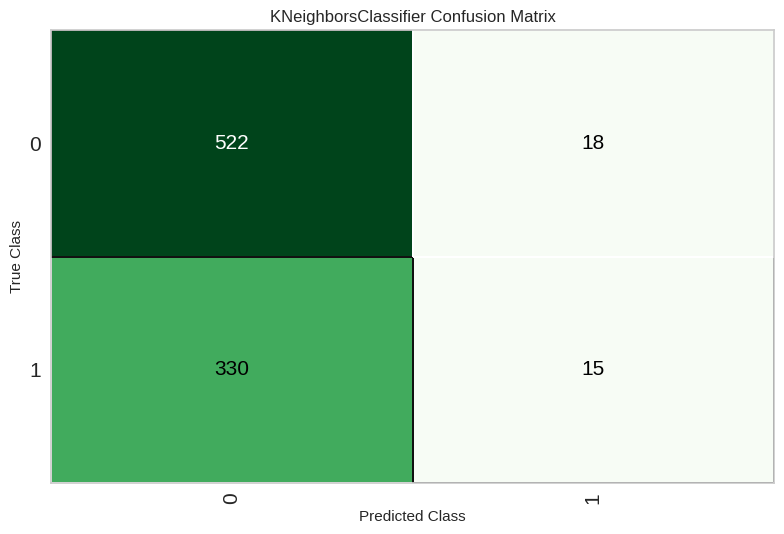

In [34]:
plot_model(tuned_knn, plot = 'confusion_matrix')

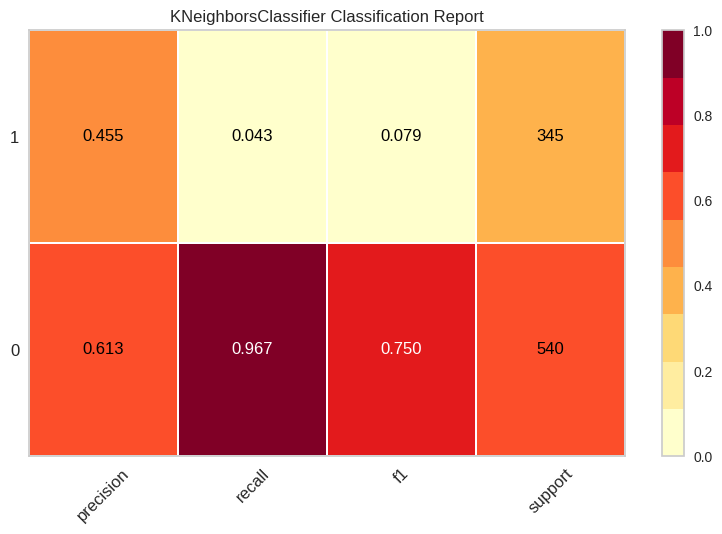

In [35]:
plot_model(tuned_knn, plot = 'class_report')

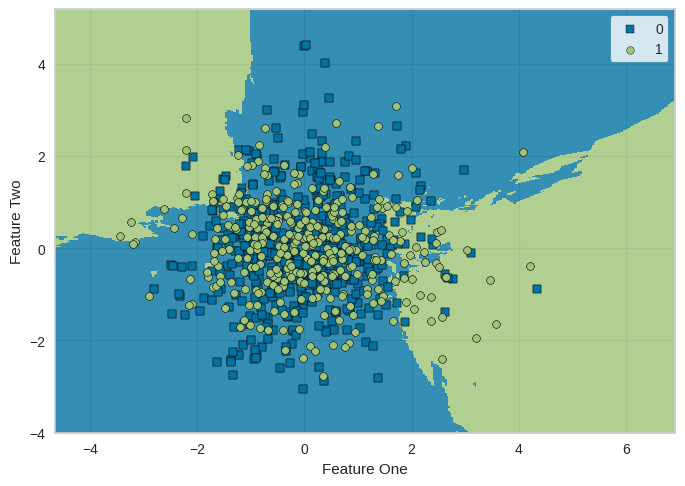

In [36]:
plot_model(tuned_knn, plot='boundary')

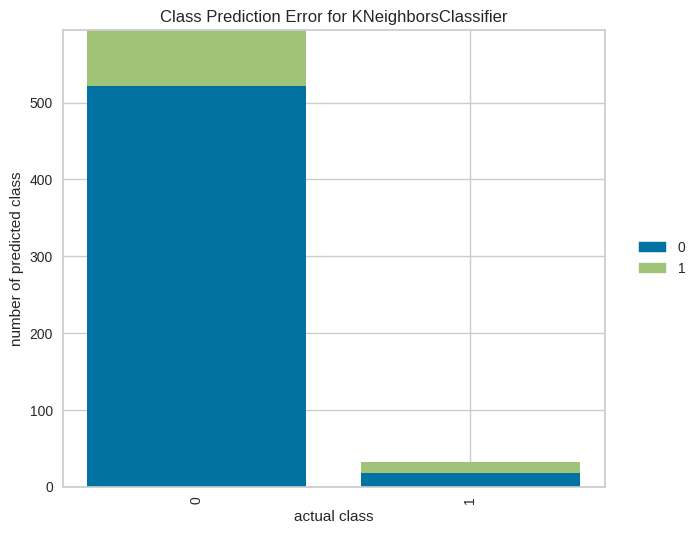

In [37]:
plot_model(tuned_knn, plot = 'error')

In [38]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6068,0.4891,0.0435,0.4545,0.0794,0.0121,0.0261


In [40]:
final_knn = finalize_model(tuned_knn)

In [41]:
save_model(final_knn,'Final KNN Model 09Sep2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ph', 'Hardness', 'Solids',
                                              'Chloramines', 'Sulfate',
                                              'Conductivity', 'Organic_carbon',
                                              'Trihalomethanes', 'Turbidity'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               str...
                  TransformerWrapper(exclude=None, include=[],
          

In [43]:
saved_final_knn = load_model('Final KNN Model 09Sep2023')

Transformation Pipeline and Model Successfully Loaded
